# Loading data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
data.columns = ["Population", "Profit"]

In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


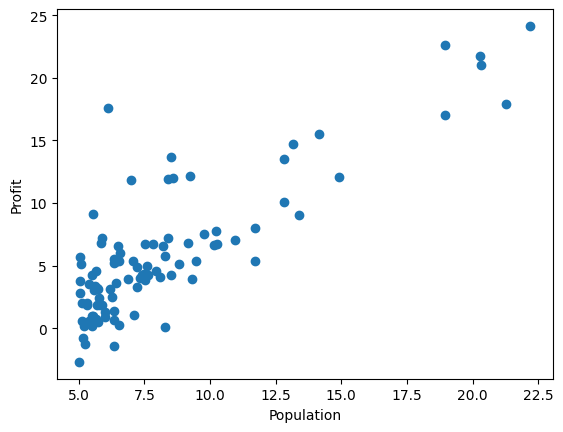

In [8]:
plt.scatter(data['Population'], data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

# Univariate linear regression

In [9]:
def compute_cost(X, y, theta) -> float:
    m = y.shape[0]
    J = np.dot((np.dot(X, theta) - y).transpose(), (np.dot(X, theta) - y)) / (2 * m)
    return float(J)

In [50]:
theta_0 = 0
theta_1 = 0

theta = np.resize(np.array([theta_0, theta_1]), (2, 1))
y = np.resize(np.array(data['Profit']), (97, 1))

X = np.array([[1, i] for i in data['Population']])

In [12]:
if round(compute_cost(X, y, theta), 2) == 32.07:
    print('The function COMPUTE_COST check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function COMPUTE_COST check was SUCCESSFUL!


In [29]:
def gradient_descent(X, y, theta, alpha, iters):    
    m = y.shape[0]
    J_iters = []
    
    for i in range(iters):
        theta = theta - ((alpha / m) * X.transpose()).dot((X.dot(theta)) - y)
        
        J_iters.append(compute_cost(X, y, theta))
        
    return np.around(theta, 2), J_iters

In [30]:
theta_new, J_iters = gradient_descent(X, y, theta, alpha=0.01, iters=1000)

In [31]:
if theta_new[0] == -3.24 and theta_new[1] == 1.13:
    print('The function GRADIENT_DESCENT check was SUCCESSFUL!')
else:
    print('Something went terribly wrong...')

The function GRADIENT_DESCENT check was SUCCESSFUL!


In [203]:
print(f'The value of the target function now: {compute_cost(X, y, theta_new)}')

The value of the target function now: 5.477891241772288


In [96]:
def h(x, theta_0, theta_1):
    return theta_0 + (theta_1 * x)

X_axes = [min(data['Population']), max(data['Population'])]
y_axes = [h(min(data['Population']), theta_new[0], theta_new[1]),
          h(max(data['Population']), theta_new[0], theta_new[1])]

In [146]:
def data_plot_with_linear_regression(data, X, y):
    plt.scatter(data['Population'], data['Profit'])
    plt.plot(X, y, color='g')
    plt.title('Data plot with linear regression')
    plt.xlabel('Population')
    plt.ylabel('Profit')
    plt.show()

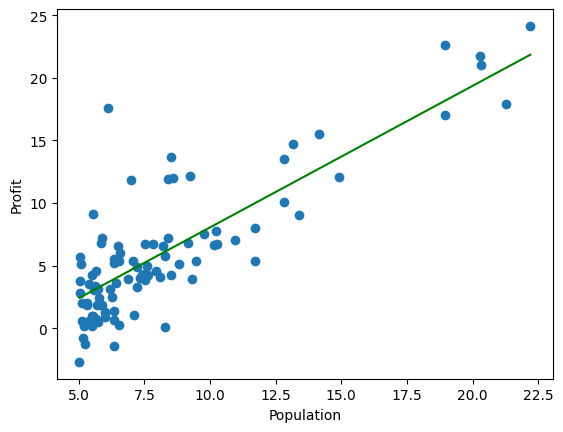

In [97]:
data_plot_with_linear_regression(data, X_axes, y_axes)

In [148]:
def plot_dependence_target_func_on_iters(J_iters):
    plt.plot(J_iters)
    plt.title('Plot of the dependence of the target function on the number of iterations')
    plt.xlabel('The values of the target function')
    plt.ylabel('Iterations')
    plt.show()

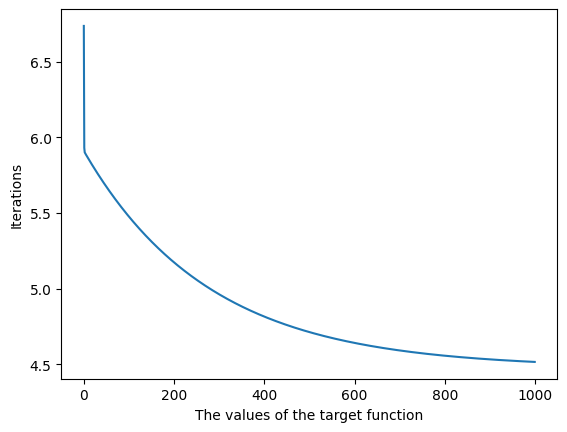

In [91]:
plot_dependence_target_func_on_iters(J_iters)

In [125]:
def experiment_with_different_values(alphas_list, iters_list, X, y, theta):
    values_of_target_function = []
    result_iters = []
    result_alphas = []
    
    for alpha in alphas_list:
        for iters in iters_list:
            _, J_iters = gradient_descent(X, y, theta, alpha, iters)
            
            result_iters.append(iters)
            result_alphas.append(alpha)
            values_of_target_function.append(round(J_iters[-1],2))
            
    results = {'iters': result_iters, 'alpha': result_alphas, 'value of target function': values_of_target_function}
    
    return results

In [202]:
alphas_list = [0.00001, 0.0001, 0.001, 0.01]
iters_list = [10, 100, 1000, 10000]

results_of_experiment = experiment_with_different_values(alphas_list, iters_list, X, y, theta)

table_with_results = pd.DataFrame(data=results_of_experiment)

table_with_results

,iters,alpha,value of target function
0,10,0.00001,31.65
1,100,0.00001,28.10
2,1000,0.00001,10.96
3,10000,0.00001,5.86
4,10,0.00010,28.09
5,100,0.00010,10.93
6,1000,0.00010,5.86
7,10000,0.00010,5.48
8,10,0.00100,10.61
9,100,0.00100,5.86


In [129]:
table_with_results[table_with_results['value of target function'] < 4.516]

,iters,alpha,value of target function
19,10000,0.01,4.48


## The class for the complete solution of this task at different parameters

In [199]:
class LinearRegression:
    theta_0 = 0
    theta_1 = 0
    
    def __init__(self, data, alpha, iters):
        self.data = data
        self.alpha = alpha
        self.iters = iters
        self.theta = None
        self.X = None
        self.y = None
        self.J_iters = None
        
    def parse_data(self):
        self.theta = np.resize(np.array([self.theta_0, self.theta_1]), (2, 1))
        self.y = np.resize(np.array(self.data['Profit']), (97, 1))
        self.X = np.array([[1, i] for i in self.data['Population']])
        
    def compute_cost(self) -> float:
        m = self.y.shape[0]
        J = np.dot((np.dot(self.X, self.theta) - self.y).transpose(), (np.dot(self.X, self.theta) - self.y)) / (2 * m)
        return float(J)
        
    def gradient_descent(self):    
        m = self.y.shape[0]
        J_iters = []
        
        for i in range(self.iters):
            self.theta = self.theta - ((self.alpha / m) * self.X.transpose()).dot((self.X.dot(self.theta)) - self.y)
            J_iters.append(compute_cost(self.X, self.y, self.theta))

        self.theta = np.around(self.theta, 2) 
        self.J_iters = J_iters
        
    def linear_function(self, X_point):
        return self.theta[0] + (self.theta[1] * X_point)
    
    def get_points_for_linear_function(self):
        X_axes = [min(self.data['Population']), max(self.data['Population'])]
        y_axes = [self.linear_function(X_axes[0]),
                  self.linear_function(X_axes[1])]
        return X_axes, y_axes
    
    def data_plot_with_linear_regression(self, X, y):
        plt.scatter(self.data['Population'], self.data['Profit'])
        plt.plot(X, y, color='g')
        plt.title('Data plot with linear regression')
        plt.xlabel('Population')
        plt.ylabel('Profit')
        plt.show()
    
    def plot_dependence_target_func_on_iters(self):
        plt.plot(self.J_iters)
        plt.title('Plot of the dependence of the target function on the number of iterations')
        plt.xlabel('The values of the target function')
        plt.ylabel('Iterations')
        plt.show()
        
    def get_solution(self, plot=True):
        self.parse_data()
        self.gradient_descent()
        print(f'The final value of the target function: {self.J_iters[-1]}')
        
        if plot:
            regression_x, regression_y = self.get_points_for_linear_function()
            self.data_plot_with_linear_regression(regression_x, regression_y)

            self.plot_dependence_target_func_on_iters()
            
        return

## Task solution with alpha = 0.001

The final value of the target function: 5.480269332020323


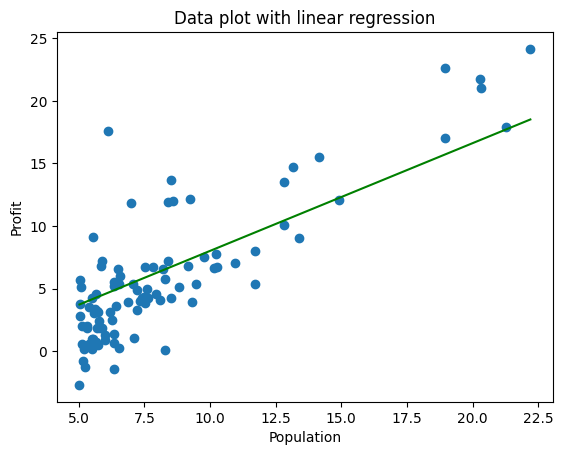

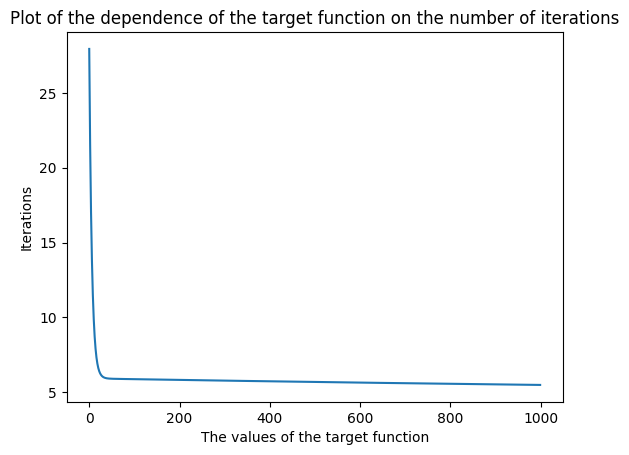

In [200]:
LinearRegression(data=data, alpha=0.001, iters=1000).get_solution()

## Task solution with alpha = 0.05

The final value of the target function: 1.0063066407904806e+100


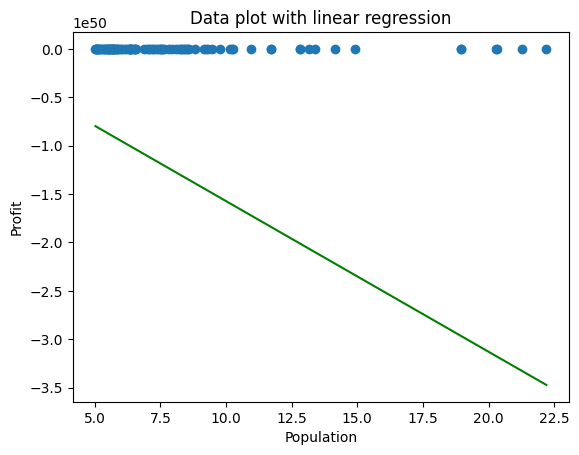

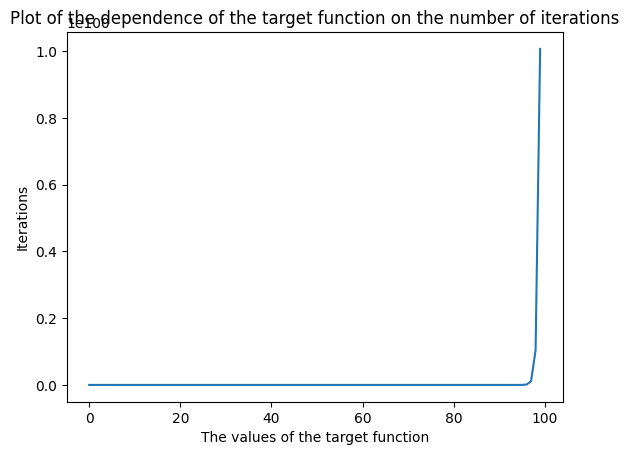

In [201]:
#ToDo: see what went wrong

LinearRegression(data=data, alpha=0.05, iters=100).get_solution()